# Startup Funding Insights:

Feature Details :
SNo - Serial number.
Date - Date of funding in format DD/MM/YYYY.
StartupName - Name of the startup which got funded.
IndustryVertical - Industry to which the startup belongs.
SubVertical - Sub-category of the industry type.
CityLocation - City which the startup is based out of.
InvestorsName - Name of the investors involved in the funding round.
InvestmentType - Either Private Equity or Seed Funding.
AmountInUSD - Funding Amount in USD.
Remarks - Other information, if any.

### Insight 1: Total No of Fundings per year.

Year and Number of fundings received:
2015 936
2016 993
2017 443


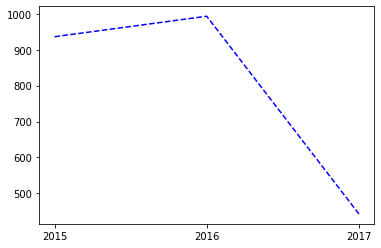

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
df1=pd.read_csv("startup_funding.csv")
df = df1.copy()
df["Date"]= df["Date"].str[-4:]
num=df.Date.value_counts()
num.sort_index(ascending=True,inplace=True)
print('Year and Number of fundings received:')
for i in range(len(num)):
    print(num.index[i],num.values[i])
    
year=num.index
value=num.values
plt.plot(year,value,"b--")
plt.show()
print()


### Insight 2: Top Indian Cities

Top Indian Cities & Number of Starups:
Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


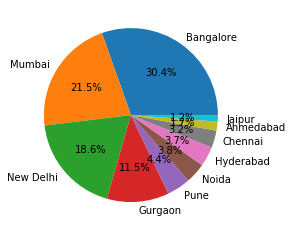

In [40]:
df=df1.copy()
import numpy as np
def splitcity(x):
    return x.split('/')[0].strip()
df['CityLocation'].dropna(inplace=True)
df['CityLocation']=df['CityLocation'].apply(splitcity)
dict=df["CityLocation"].value_counts()
dict["Bangalore"]=dict["Bangalore"]+dict["bangalore"]
dict["New Delhi"]=dict["New Delhi"]+dict["Delhi"]
loc=[]
num=[]
print('Top Indian Cities & Number of Starups:')
for i in range(10):
        print(dict.index[i],dict.values[i])
        loc.append(dict.index[i])
        num.append(dict.values[i])
plt.pie(num,labels=loc,autopct="%.1f%%")
plt.show()



### Insight 3: Percentage funding per city

In [38]:
df=df1.copy()
def splitcity(x):
    return x.split('/')[0].strip()
df['CityLocation'].dropna(inplace=True)
df['City']=df['CityLocation'].apply(splitcity)
df['City'].replace('Delhi','New Delhi',inplace=True)
df['City'].replace('bangalore','Bangalore',inplace=True)
#df['City'].replace('Pune/US','Pune',inplace=True)

df['AmountInUSD'].dropna(inplace=True)
def convert(x):
    x=x.replace(',','')
    return int(x)
df['AmountInUSD']=df['AmountInUSD'].apply(convert)
df['AmountInUSD'].dropna(inplace=True)
#print(df['AmountInUSD'])
city_amount=df.groupby('City')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
#print(city_amount)
per_amount =np.true_divide(city_amount,city_amount.sum())*100
print('Percentage funding per city:')
for i in range(len(city_amount)):
    x=per_amount[i]
    x=format(x,".2f")
    print(city_amount.index[i],x)

Percentage funding per city:
Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


### Insight 4 : Investment Type

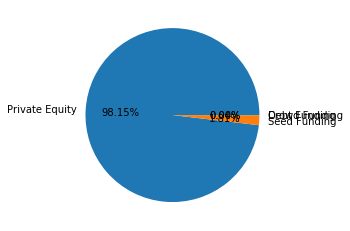

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [20]:
df=df1.copy()
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
# print(df['InvestmentType'].unique())
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(',','')))
ak = df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)
city = ak.index
#print(city)
city_amount = ak.values
per_amount = np.true_divide(city_amount,city_amount.sum())*100
plt.pie(per_amount,labels=city,autopct="%.2f%%")
plt.show()
for i in range(len(ak)):
    x=per_amount[i]
    x=format(x,".2f")
    print(city[i],x)



### Insight 4: Top Industries 

In [36]:
df=df1.copy()
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)
#a=df['IndustryVertical'].unique()
#print(a)
df['AmountInUSD'].fillna('0',inplace=True)
def convert(x):
    x=x.replace(',','')
    return int(x)
df['AmountInUSD']=df['AmountInUSD'].apply(convert)
df['AmountInUSD'].dropna(inplace=True)
df['IndustryVertical'].dropna(inplace=True)

#print(df['IndustryVertical'])
#print(df['AmountInUSD'])
ak = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)
#print(ak)
amount=[]
city=[]
for i in range(5):
    amount.append(ak.values[i])
    city.append(ak.index[i])
amount=np.array(amount)
per_amount =np.true_divide(amount,amount.sum())*100
print('Top Industries & percentage share:')
for i in range(len(amount)):
    x=per_amount[i]
    x=format(x,".2f")
    print(ak.index[i],x+'%')


Top Industries & percentage share:
Ecommerce 40.53%
Consumer Internet 35.95%
Technology 10.45%
Online Marketplace 6.63%
E-Commerce & M-Commerce platform 6.44%


### Insight 5 : Top Startups(Most funded)

In [28]:
df=df1.copy()
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",",""))) 
df["AmountInUSD"] = pd.to_numeric(df["AmountInUSD"]) 
fund=df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5] 
#print(fund)
print('Percentage of total amount of funding received:')
per_amount =np.true_divide(fund,fund.sum())*100
for i in range(len(fund)):
    x=per_amount[i]
    x=format(x,".2f")
    print(fund.index[i],x)


Percentage of total amount of funding received:
Paytm 29.86
Flipkart 28.84
Ola 24.24
Snapdeal 8.93
Oyo 8.13


### Insight 5: Number of Funding Rounds

In [35]:
count=df['StartupName'].value_counts().sort_values(ascending=False)[0:5]
print('Number Of Funding rounds:')
for i in range(5):
    print(count.index[i],count.values[i])


Number Of Funding rounds:
Swiggy 7
UrbanClap 6
Medinfi 5
Jugnoo 5
Paytm 5


### Insight 6: Top Investor

In [33]:
df=df1.copy()
df['InvestorsName'].dropna(inplace=True)
dict={}
a=df['InvestorsName']
for i in a:
#    print(i)
    x=i.split(',')
    for j in x:
        y=j.strip()
        if y in dict:
            dict[y]=dict[y]+1
        else:
            dict[y]=1
#print(dict)
max=0
index=0
for i in dict:
    if dict[i]>max:
        max=dict[i]
        index=i
print('Name & Number of times the top investor invested:')
print(index,max)

Name & Number of times the top investor invested:
Sequoia Capital 64
